Introduction:

Our project was to use data analysis and programming tools that we have learned to create a NFL Playoff Projections. We hoped to get as accurate of a prediction as possible through using NFL statistics. We will be explaining the stats that we’ve considered, how we accounted for upsets, and finally our predicted bracket. 

Data Presentation:

Initial datasets were found from https://www.pro-football-reference.com. We included an NFC bracket and an AFC bracket in our analysis.

In [2]:
import pandas as pd
afc = pd.read_csv("afc.csv")
afc.head()

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Philadelphia Eagles*,14,3,0,0.824,477,344,133,7.8,-1.3,6.5,5.8,0.7
1,Dallas Cowboys+,12,5,0,0.706,467,342,125,7.4,-0.8,6.5,5.3,1.3
2,New York Giants+,9,7,1,0.559,365,371,-6,-0.4,0.0,-0.4,-0.8,0.4
3,Washington Commanders,8,8,1,0.500,321,343,-22,-1.3,0.4,-0.9,-3.5,2.6
4,Minnesota Vikings*,13,4,0,0.765,424,427,-3,-0.2,0.1,-0.1,2.8,-2.9


In [5]:
import pandas as pd

nfc = pd.read_csv("nfc.csv")
nfc.head()

,Tm,W,L,T,W-L%,PF,PA,PD,MoV,SoS,SRS,OSRS,DSRS
0,Philadelphia Eagles*,14,3,0,0.824,477,344,133,7.8,-1.3,6.5,5.8,0.7
1,Dallas Cowboys+,12,5,0,0.706,467,342,125,7.4,-0.8,6.5,5.3,1.3
2,New York Giants+,9,7,1,0.559,365,371,-6,-0.4,0.0,-0.4,-0.8,0.4
3,Minnesota Vikings*,13,4,0,0.765,424,427,-3,-0.2,0.1,-0.1,2.8,-2.9
4,Tampa Bay Buccaneers*,8,9,0,0.471,313,358,-45,-2.6,0.4,-2.3,-3.3,1.1



We removed irrelevant teams from the dataset. We subsetted the two datasets based upon Team Name, Points for, Points against, and Strength of Schedule. Our final datasets look like:

In [6]:
df = afc[["Tm", "PF", "PA", "SoS"]]
df.head()

,Tm,PF,PA,SoS
0,Philadelphia Eagles*,477,344,-1.3
1,Dallas Cowboys+,467,342,-0.8
2,New York Giants+,365,371,0.0
3,Washington Commanders,321,343,0.4
4,Minnesota Vikings*,424,427,0.1


In [7]:
df = nfc[["Tm", "PF", "PA", "SoS"]]
df.head()

,Tm,PF,PA,SoS
0,Philadelphia Eagles*,477,344,-1.3
1,Dallas Cowboys+,467,342,-0.8
2,New York Giants+,365,371,0.0
3,Minnesota Vikings*,424,427,0.1
4,Tampa Bay Buccaneers*,313,358,0.4




**Data Exploration and Analysis**

Points For: <br>
The amount of points a team scored. You need to score to win so this was an obvious statistic

Points Against: <br>
The amount of points scored against your team. This measures how good your team’s defense is – you can’t win the game if the other team scores more points than you (Vikings and Lions).

Point Differential: <br>
We calculated Points For - Points Against to find the differential. We believed that if you scored more points than you let up over the course of the season, it’s indicative that you have a better team. 

Strength of Schedule (SoS): <br>
We utilized this statistic because simply comparing Points Scored and Points Against wouldn’t be a completely perfect measurement of how good a team is because not every team plays each other every year. The mean of the total SoS’s are 0, meaning negative values equate to playing easier teams and positive values equate to harder teams. This means that some times have easier games or harder games. Therefore, by factoring in the strength of the teams they faced, we could yield a more accurate prediction of how good a team is. 

Calculated Strength Value (quid): <br>
I don’t know why it’s named quid. Thomas picked a terrible name. Regardless, this was calculated by taking the (Points For - Points Against)/17 for 17 games in a season, and adding the Strength of Schedule. Essentially, it’s the average point differential plus SoS. Since SoS can be positive and negative, an easier schedule would hurt your “quid” value. Then, by sorting the quid value, we have our predicted strength stat. 


                      Tm   PF   PA  SoS  PointD      quid
4  Tampa Bay Buccaneers*  313  358  0.4     -45 -2.247059
6      Seattle Seahawks+  407  401 -0.8       6 -0.447059
2       New York Giants+  365  371  0.0      -6 -0.352941
3     Minnesota Vikings*  424  427  0.1      -3 -0.076471
0   Philadelphia Eagles*  477  344 -1.3     133  6.523529
1        Dallas Cowboys+  467  342 -0.8     125  6.552941
5   San Francisco 49ers*  450  277 -2.3     173  7.876471


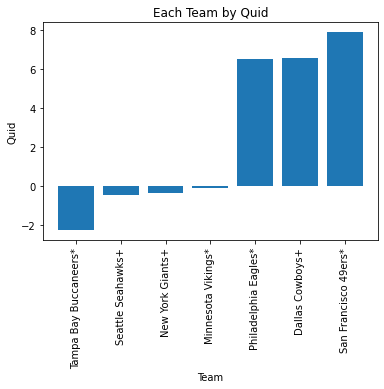

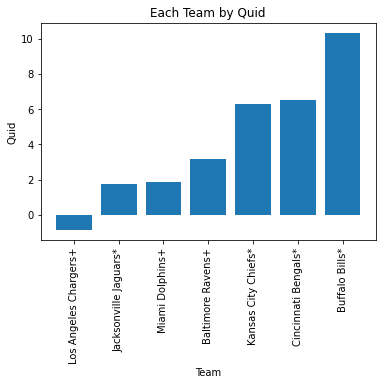

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
nfc = pd.read_csv("nfc.csv")
afc = pd.read_csv("afc.csv")
df = nfc[["Tm", "PF", "PA", "SoS"]]
df["PointD"] = df.apply(lambda row: row.PF-row.PA, axis=1)
df["quid"] = df.apply(lambda row: (row.PointD)/17 + row.SoS, axis = 1)
df.sort_values(by = "quid", ascending = True, inplace = True)
print(df)
quids = df["quid"]
teams = df["Tm"]
plt.bar(teams,quids)
plt.title("Each Team by Quid")
plt.xlabel("Team")
plt.ylabel("Quid")
plt.xticks(rotation=90)
plt.show()

df2 = afc[["Tm", "PF", "PA","SoS"]]
df2["PointD"] = df2.apply(lambda row: row.PF-row.PA, axis=1)
df2["quid"] = df2.apply(lambda row: (row.PointD)/17 + row.SoS, axis = 1)
df2.sort_values(by = "quid", ascending = True, inplace = True)
quids2 = df2["quid"]
teams2 = df2["Tm"]
plt.bar(teams2,quids2)
plt.title("Each Team by Quid")
plt.xlabel("Team")
plt.ylabel("Quid")
plt.xticks(rotation=90)
plt.show()

Bigger is better. 💪



Playoff Team Round by Round: <br>
This was done through each team’s “quid” value. However, we had to account for upsets. We therefore compared the two quid values to create a probability of each team winning. Then, we flipped coins. For example: The Bills have a quid value of ~10 and the Bengals have ~7. We would flip 18 coins, with the higher seed being heads and the lower being tails. If there were 11 heads and 7 tails, it would mean the Bills won. This explains why we have the Jags beating the Cheifs. We flipped a single head that time. We used https://random.org to flip the coins – Malcolm and I (Steven) did a similar thing to find differential equation models using this website in Multivariable Calc. 

Testing the validity of this method: <br>
We utilized the 2021 NFL statistics and ran this model. The predicted brackets were relatively similar to what had actually happened so we decided to keep it as is. It did not predict the 

**Conclusion** <br>
We chose the Buffalo Bills as the winners by following the previous model. The process helped us learn about how we could create equations and extrapolate data and apply them to real-world situations. If we had more time, we would have created a relative weighting system and dividing the season into thirds. The final third of the season would have more weight than the first two, because it only really matters how could your team is going into the playoffs. You could calculate quid values for each third, and multiply say the first third by 0.1, the next third by 0.3, and the final by 0.6. Adding those values together would mean the latter third is worth double the middle and 6 times the first. This could be adjusted as needed by applying this model to previous years. 
The logic behind this system is that if you have Super-Bowl caliber team in the first 12 games and you become the 2008 lions in the next 5, you shouldn’t have a half-decent quid value at all. Alternatively, if a team becomes really good late in the season, it would be easier to predict a winner. This would likely give more favorable chances to teams like the Bengals last year who started picking up steam towards the end of the year, and would explain their playoff run. Finally, you would have to filter out games that happened after a team clinched the playoffs, as it is not likely that they’re trying as hard.
This wouldn’t be super hard to implement, but finding the statistics for it were nigh-impossible. I tried to use the waybackmachine, but it didn’t have any saved statistics and we couldn’t find a website with this information. 

